In this article, I will explain how to develop an Automated Supervised Machine Learning Regression program, which automatically tunes the hyperparameters and prints out the final results as tables, graphs and boxplots.

I always like to keep my libraries together, hence I import all of them at once in the beginning of the code.

In [17]:
import pandas as pd
import numpy as np
import statistics
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

Lets import our dataset and define the features and the predictors.

In [2]:
#Importing the datasets-------------------------------------------------------
print ("Importing datasets")
df = pd.read_csv('DATA.csv')  

Importing datasets


Let's take a look at how the dataset looks. I like using df.describe() function to have some statistics about each column.

In [3]:
df.describe()

,A,B,C,D,E,F
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,12.438889,13.240741,722.518519,19.259259,12.296296,6883.202781
std,0.181518,1.476550,124.861884,1.631248,2.267069,1316.064353
min,12.050000,11.500000,496.000000,16.000000,9.000000,4032.191235
25%,12.350000,12.000000,632.500000,18.000000,11.000000,5955.425767
50%,12.400000,13.000000,720.000000,19.000000,12.000000,6654.906860
75%,12.525000,14.250000,832.000000,20.000000,14.000000,8137.799244
max,12.800000,17.000000,885.000000,23.000000,18.000000,9241.557194


Let's define the features as X and the column we want to predict (column F) as y. 

In [4]:
X = df.iloc[:,:-1].values 
y = df.iloc[:,5].values

This defines X as all the values except the last column (columns A,B,C,D,E), and y as the last column (column numbers start from zero, hence: 0 - A, 1 - B, 2 - C, 3 - D,4 - E, 5 -F).

For some algorithms we might want to use X as preprocessed (normalized) values (X2). This mostly provides higher accuracies for algorithms such as Multi Layer Perceptron (MLP) or Support Vector Machines (SVM). Hence, for the rest of the program, X2 will be used for non-linear ML algorithms such as random forest, XGBoost, MLP, SVM. However, X will be used for polynomial regressions and linear regression to evaluate the regression constants easier.

In [5]:
X2 = preprocessing.scale(X)

We have to split our dataset as train and test data. For this we can use train_test_split by sklearn.model_selection. We will do this for both X and X2. Test size of 0.20 means that 20% of the data will be used as test data and 80% of the data will be used for training.

In [6]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size = 0.20)
X_train2, X_test2, y_train2, y_test2= train_test_split(X2,y,test_size = 0.20)


We might not always want to tune the parameters of models, or only tune for some models. For this I have defined basic inputs. When they are set to "yes", the program will perform the tuning.

In [7]:
#Inputs------------------------------------------------------------------------
randomforestparametertuning = "no" #yes or no
XGboostparametertuning      = "no" #yes or no
SVMparametertuning          = "no" #yes or no
MLPparametertuning          = "no" #yes or no

The first one is training, testing and tuning the random forest regression. The values of param_grid might be updated regarding the problem (i.e., some problems might require higher values of n_estimators, while some might require lower ranges).

In [8]:
if randomforestparametertuning == "yes":
    print ("Performing gridsearch in random forest")

    # Create the parameter grid based on the results of random search 
    param_grid = {
        'bootstrap': [True,False],
        'max_depth': [40, 50, 60, 70],
        'max_features': ['auto', 'sqrt'],
        'min_samples_leaf': [1,2,3,],
        'min_samples_split': [3, 4, 5,6,7],
        'n_estimators': [50,100,150,200,250,300,350,400,500]
        }
    
    # Create a based model
    rf = RandomForestRegressor()
    # Instantiate the grid search model
    grid_search_RF = GridSearchCV(estimator = rf, param_grid = param_grid, 
                              cv = 3, n_jobs = -1, verbose = 2)
    
    # Fit the grid search to the data
    grid_search_RF.fit(X_train2, y_train2)
    print("Grid Search Best Parameters for Random Forest Regression")
    print (grid_search_RF.best_params_)

The second one is training, testing and tuning the XGBoost regression. The values of grid might be updated regarding the problem (i.e., some problems might require higher values of n_estimators, while some might require lower ranges).

In [9]:
#XGBoost Parameter Tuning------------------------------------------------------
if XGboostparametertuning == "yes":
    print("XGBoost parameter tuning")
    # Create the parameter grid based on the results of random search 
    grid = {'colsample_bytree': [0.9,0.8,0.7],
                    'gamma': [2,3,4,5],
                    'learning_rate': [0.1,0.2,0.3],
                    'max_depth': [8,9,10,11,12],
                    'n_estimators': [150,200,250,300,350],
                    'subsample': [0.8,0.9,1],
                    'reg_alpha': [15,18,20],
                    'min_child_weight':[3,4,5]}

    # Create a based model
    XGB = XGBRegressor()
    # Instantiate the grid search model
    grid_search_XGB = GridSearchCV(estimator = XGB, param_grid = grid, 
                              cv = 3, n_jobs = -1, verbose = 2)
    
    # Fit the grid search to the data
    grid_search_XGB.fit(X_train2, y_train2)
    print("Grid Search Best Parameters for XGBoost")
    print (grid_search_XGB.best_params_) 

The third one is training, testing and tuning the SVM regression. The values of C_range or gamma_range might be updated regarding the problem.

In [10]:
#SVM Parameter Tuning----------------------------------------------------------
if SVMparametertuning == "yes":
    print("SVM parameter tuning")

    C_range = 10. ** np.arange(-3, 3)
    gamma_range = 10. ** np.arange(-5, 3)
    param_grid = dict(gamma=gamma_range, C=C_range)
    svr_rbf = SVR()
    # Instantiate the grid search model
    grid_search_svm = GridSearchCV(estimator = svr_rbf, param_grid = param_grid, 
                              cv = 3, n_jobs = -1, verbose = 2)
    # Fit the grid search to the data
    grid_search_svm.fit(X_train2, y_train2)
    print("Grid Search Best Parameters for SVM")
    print (grid_search_svm.best_params_)

The fourth one is training, testing and tuning the MLP algorithm. The values of param_grid might be updated regarding the problem.

In [11]:
if MLPparametertuning == "yes":
    print("MLP parameter tuning")

    param_grid = {
        'hidden_layer_sizes': [50,100,150,200,250,300,350],
        'activation': ['identity','logistic','tanh','relu'],
        'solver': ['lbfgs', 'sgd','adam'],
        'learning_rate': ['constant','invscaling','adaptive']}
    MLP = MLPRegressor()
    # Instantiate the grid search model
    grid_search_MLP = GridSearchCV(estimator = MLP, param_grid = param_grid, 
                              cv = 3, n_jobs = -1, verbose = 2)
    
    # Fit the grid search to the data
    grid_search_MLP.fit(X_train2, y_train2)
    print("Grid Search Best Parameters for MLP")
    print (grid_search_MLP.best_params_)


The below commands provide a summary of the best parameters obtained from the GridSearch of all these four algortihms.

Next thing, we will be fitting 9 different algortihms to our data to see which one performs the best. These are namely: multi linear regression, ridge regression, lasso regression, polynomial regression (degree=2), polynomial regression (degree=3), random forest regression (with the best parameters obtained from GridSearch), XGBoost regression (with the best parameters obtained from GridSearch), SVM regression (with the best parameters obtained from GridSearch) and MLP (with the best parameters obtained from GridSearch).

In [12]:
#Fitting multi linear regression to data---------------------------------------
print ("Fit multilinear regression")
linreg = LinearRegression()
linreg.fit(X_train,y_train)

#Fitting ridge regression to data----------------------------------------------
print ("Fit ridge regression")
ridgeReg = Ridge(alpha=0.05, normalize=True)
ridgeReg.fit(X_train,y_train)

#Fitting random forest regression to data--------------------------------------
print ("Fit random forest regression")
try:
    randreg = RandomForestRegressor(**grid_search_RF.best_params_)
except:
    randreg = RandomForestRegressor()
randreg.fit(X_train2,y_train2)

#Fitting XGboost regression to data--------------------------------------------
print ("Fit XGBoost regression")
try:
    XGBreg = XGBRegressor(**grid_search_XGB.best_params_)
except: 
    XGBreg = XGBRegressor()
XGBreg.fit(X_train2, y_train2)

#Fitting LASSO regression to data----------------------------------------------
print ("Fit Lasso regression")
lassoreg = Lasso(alpha=0.01, max_iter=10e5)
lassoreg.fit(X_train, y_train)

#Support Vector Machines-------------------------------------------------------
print ("Fit SVR RBF regression")
try:
    svr_rbf = SVR(**grid_search_svm.best_params_)
except:
    svr_rbf = SVR()
    svr_rbf.fit(X_train2, y_train2)

#MLP Regressor-----------------------------------------------------------------
print ("Fit Multi-layer Perceptron regressor")
try:
    MLP = MLPRegressor(**grid_search_MLP.best_params_)
except:
    MLP = MLPRegressor()    
MLP.fit(X_train2, y_train2)

Fit multilinear regression
Fit ridge regression
Fit random forest regression
Fit XGBoost regression
Fit Lasso regression
Fit SVR RBF regression
Fit Multi-layer Perceptron regressor


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

For the error analysis, we are using four different statistics. The first one is r_score, which is the r2 (coefficient of determination) of the test data and the predicted data. The second is MAE = Mean Absolute Error, the third one is MSE = Mean Squared Error and the third one is MAPE = Mean Absolute Percentage Error. The MAE and MSE calculations come directly from sklearn.metrics / mean_absolute_error and mean_squared_error. For the r_score and MAPE, we are defining below functions.

In [13]:
#Define the missing sklearn.metrics parameter of mean absolute percentage error
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return (np.abs((y_true - y_pred) / y_true)) * 100

def r_score(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    residuals = y_true- y_pred
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y_true-np.mean(y_true))**2)
    r_squared = 1 - (ss_res / ss_tot)    
    return r_squared

Now that the error statistics are defined, lets predict the predicted values by the algorithm and calculate the errors.

In [14]:
y_predicted_RF = randreg.predict(X_test2)
y_predicted_LREG = linreg.predict(X_test)
y_predicted_RIDGE = ridgeReg.predict(X_test)
y_predicted_XGB = XGBreg.predict(X_test2)
y_predicted_LASSO = lassoreg.predict(X_test)
y_predicted_svr_rbf = svr_rbf.predict(X_test2)
y_predicted_MLP = MLP.predict(X_test2)

r_RF=  r_score(y_test2, y_predicted_RF)
MAE_RF = mean_absolute_error(y_test2, y_predicted_RF)
MSE_RF = mean_squared_error(y_test2, y_predicted_RF)
MAPE_RF = mean_absolute_percentage_error(y_test2, y_predicted_RF)

r_LREG=  r_score(y_test, y_predicted_LREG)
MAE_LREG = mean_absolute_error(y_test, y_predicted_LREG)
MSE_LREG = mean_squared_error(y_test, y_predicted_LREG)
MAPE_LREG = mean_absolute_percentage_error(y_test, y_predicted_LREG)

r_RIDGE=  r_score(y_test, y_predicted_RIDGE)
MAE_RIDGE = mean_absolute_error(y_test, y_predicted_RIDGE)
MSE_RIDGE = mean_squared_error(y_test, y_predicted_RIDGE)
MAPE_RIDGE = mean_absolute_percentage_error(y_test, y_predicted_RIDGE)

r_XGB=  r_score(y_test2, y_predicted_XGB)
MAE_XGB = mean_absolute_error(y_test2, y_predicted_XGB)
MSE_XGB = mean_squared_error(y_test2, y_predicted_XGB)
MAPE_XGB = mean_absolute_percentage_error(y_test2, y_predicted_XGB)

r_LASSO=  r_score(y_test, y_predicted_LASSO)
MAE_LASSO = mean_absolute_error(y_test, y_predicted_LASSO)
MSE_LASSO = mean_squared_error(y_test, y_predicted_LASSO)
MAPE_LASSO = mean_absolute_percentage_error(y_test, y_predicted_LASSO)

r_svr_rbf=  r_score(y_test2, y_predicted_svr_rbf)
MAE_svr_rbf = mean_absolute_error(y_test2, y_predicted_svr_rbf)
MSE_svr_rbf = mean_squared_error(y_test2, y_predicted_svr_rbf)
MAPE_svr_rbf = mean_absolute_percentage_error(y_test2, y_predicted_svr_rbf)

r_MLP=  r_score(y_test2, y_predicted_MLP)
MAE_MLP = mean_absolute_error(y_test2, y_predicted_MLP)
MSE_MLP = mean_squared_error(y_test2, y_predicted_MLP)
MAPE_MLP = mean_absolute_percentage_error(y_test2, y_predicted_MLP)

errors = [{'Model Name': 'Random Forest Regression', 'R2': r_RF, 'MAE': MAE_RF, 'MSE': MSE_RF, 'MAPE (%)': np.mean(MAPE_RF), 'Median Error (%)': statistics.median(MAPE_RF)},
          {'Model Name': 'Linear Regression', 'R2': r_LREG, 'MAE': MAE_LREG, 'MSE': MSE_LREG, 'MAPE (%)': np.mean(MAPE_LREG), 'Median Error (%)': statistics.median(MAPE_LREG)},
          {'Model Name': 'Ridge Regression', 'R2': r_RIDGE, 'MAE': MAE_RIDGE, 'MSE': MSE_RIDGE, 'MAPE (%)': np.mean(MAPE_RIDGE), 'Median Error (%)': statistics.median(MAPE_RIDGE)},
          {'Model Name': 'XGBoost Regression', 'R2': r_XGB, 'MAE': MAE_XGB, 'MSE': MSE_XGB, 'MAPE (%)': np.mean(MAPE_XGB), 'Median Error (%)': statistics.median(MAPE_XGB)},
          {'Model Name': 'Lasso Regression', 'R2': r_LASSO, 'MAE': MAE_LASSO, 'MSE': MSE_LASSO, 'MAPE (%)': np.mean(MAPE_LASSO), 'Median Error (%)': statistics.median(MAPE_LASSO)},
          {'Model Name': 'Support Vector Machine', 'R2': r_svr_rbf, 'MAE': MAE_svr_rbf, 'MSE': MSE_svr_rbf, 'MAPE (%)': np.mean(MAPE_svr_rbf), 'Median Error (%)': statistics.median(MAPE_svr_rbf)},
          {'Model Name': 'Multi-layer Perceptron', 'R2': r_MLP, 'MAE': MAE_MLP, 'MSE': MSE_MLP, 'MAPE (%)': np.mean(MAPE_MLP), 'Median Error (%)': statistics.median(MAPE_MLP)}]

df_estimationerrors = pd.DataFrame(errors)
df_estimationerrors= df_estimationerrors.sort_values(by=['Median Error (%)'])

Let's take a look at our error table:

In [15]:
print(df_estimationerrors)

                 Model Name         R2          MAE           MSE   MAPE (%)  \
1         Linear Regression   0.988445   109.671023  1.941709e+04   1.427712   
4          Lasso Regression   0.988437   109.709483  1.943049e+04   1.428133   
2          Ridge Regression   0.984014   130.192410  2.686210e+04   1.620047   
5    Support Vector Machine  -0.055287   742.351076  8.867127e+05  13.179532   
3        XGBoost Regression   0.465497   607.003915  4.491201e+05   9.098057   
0  Random Forest Regression   0.387519   710.505778  5.146419e+05  11.476428   
6    Multi-layer Perceptron -49.154381  6426.365156  4.214259e+07  99.851249   

   Median Error (%)  
1          1.464946  
4          1.465053  
2          1.632919  
5          8.310402  
3          9.071413  
0         10.304616  
6         99.869765  


Moreover, perform a principal component analysis (PCA) using the random forest regression results:

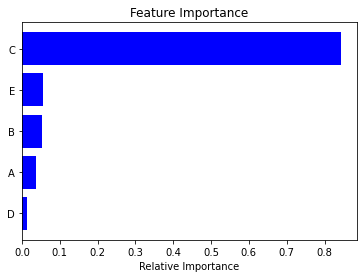

In [18]:
#Principal Component Analysis
features = df.columns[:-1]
importances = randreg.feature_importances_
indices = np.argsort(importances)
plt.figure(3) #the axis number
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.savefig('Feature Importance.png', 
              bbox_inches='tight', dpi = 500)

df_estimationerrors.to_csv("errors.csv")